#Importing Required Libraries

In [29]:
import pandas as pd

#DFA-Implementation

In [30]:
class DFA():
    alphabets = []
    states = []
    intial_state = ""
    final_states = []
    transition_table = 0
    
    
    def __init__(self,states = [],alp = [],transition = 0,intial = "a", final = []):
        self.states = states
        self.alphabets  = alp
        self.intial_state = intial
        self.final_states = final 
        self.transition_table = transition
    
    def display(self):
        print("alphabets:",self.alphabets)
        print("finite states:",self.states)
        print("intial state:",self.intial_state)
        print("final states:",self.final_states)
        print("transition tabel:\n",self.transition_table)
    
    def perform_transitions(self,string = "10"):
        current_state = self.intial_state
        for element in string:
            if element not in self.alphabets:
                return -1
            current_state = self.transition_table.at[list(self.transition_table["State"]).index(current_state),element]
        if current_state in self.final_states:
            return 1
        else:
            return 0
        

Creating Transition Tables for all DFA's

In [31]:

data={'State':['q0','q1','q2','q3'],'0':['q1','q0','q3','q2'],'1':['q3','q2','q1','q0']}
transition_table1=pd.DataFrame(data,index=None)
transition_table1 

data={'State':['q0','q1','q2','q3','q4'],'0':['q3','q1','q2','q4','q4'],'1':['q1','q2','q2','q3','q4']}
transition_table2=pd.DataFrame(data,index=None)
transition_table2

data={'State':['q0','q1','q2','q3'],'a':['q2','q3','q3','q3'],'b':['q2','q2','q3','q3'],'c':['q1','q2','q3','q3']}
transition_table3=pd.DataFrame(data,index=None)

In [32]:
transition_table1

,State,0,1
0,q0,q1,q3
1,q1,q0,q2
2,q2,q3,q1
3,q3,q2,q0


In [33]:
transition_table2

,State,0,1
0,q0,q3,q1
1,q1,q1,q2
2,q2,q2,q2
3,q3,q4,q3
4,q4,q4,q4


In [34]:
transition_table3

,State,a,b,c
0,q0,q2,q2,q1
1,q1,q3,q2,q2
2,q2,q3,q3,q3
3,q3,q3,q3,q3


< DFA - Parameters >

In [35]:
dfa = list()

#DFA-1

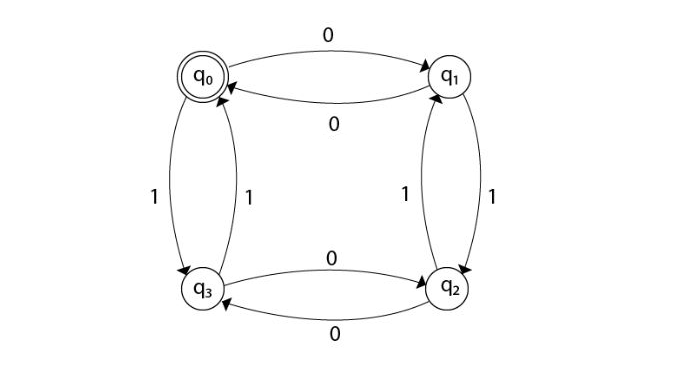

In [36]:
alphabets = ['0','1']
states = list(transition_table1["State"])
intial_state = "q0"
final_states = ["q0"]

dfa.append(DFA(states,alphabets,transition_table1,intial_state,final_states))
dfa[0].display()


alphabets: ['0', '1']
finite states: ['q0', 'q1', 'q2', 'q3']
intial state: q0
final states: ['q0']
transition tabel:
   State   0   1
0    q0  q1  q3
1    q1  q0  q2
2    q2  q3  q1
3    q3  q2  q0


#DFA-2

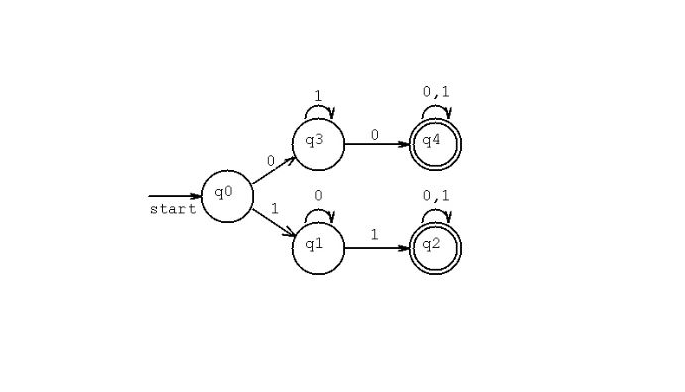

In [37]:
alphabets = ['0','1']
states = list(transition_table2["State"])
intial_state = states[0]
final_states = ['q2','q4']

dfa.append(DFA(states,alphabets,transition_table2,intial_state,final_states))
dfa[1].display()

alphabets: ['0', '1']
finite states: ['q0', 'q1', 'q2', 'q3', 'q4']
intial state: q0
final states: ['q2', 'q4']
transition tabel:
   State   0   1
0    q0  q3  q1
1    q1  q1  q2
2    q2  q2  q2
3    q3  q4  q3
4    q4  q4  q4


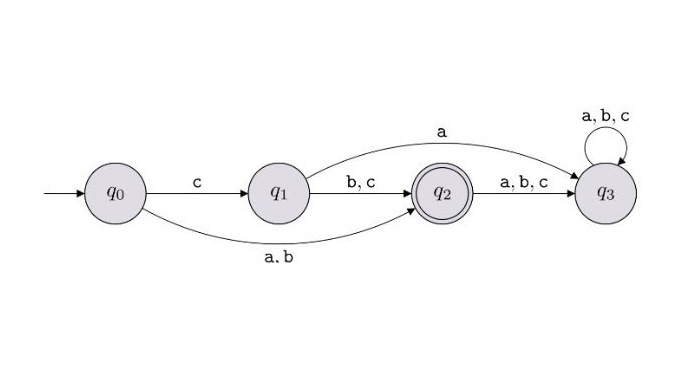

In [38]:
alphabets = ['a','b','c']
states = list(transition_table3["State"])
intial_state = states[0]
final_states = ["q2"]

dfa.append(DFA(states,alphabets,transition_table3,intial_state,final_states))
dfa[2].display()

alphabets: ['a', 'b', 'c']
finite states: ['q0', 'q1', 'q2', 'q3']
intial state: q0
final states: ['q2']
transition tabel:
   State   a   b   c
0    q0  q2  q2  q1
1    q1  q3  q2  q2
2    q2  q3  q3  q3
3    q3  q3  q3  q3


#Reading String from file 

In [39]:
strings_01 = pd.read_csv("strings_01.csv")
strings_abc = pd.read_csv("strings_abc.csv")

#Check Strings DFA-1

In [40]:
for string in strings_01["String"]:
    flag = dfa[0].perform_transitions(string)
    if flag == -1:
        print(string,":- Invalid String!")
    elif flag == 0:
        True
        print(string,":- Not-Accepted")
    else:
        print(string,":- Accepted")


abbb :- Invalid String!
100 :- Not-Accepted
101 :- Not-Accepted
0101 :- Accepted
0 :- Not-Accepted
00 :- Accepted
01 :- Not-Accepted
10 :- Not-Accepted
1 :- Not-Accepted
10001 :- Not-Accepted
010001 :- Accepted
10101 :- Not-Accepted
10110 :- Not-Accepted
001 :- Not-Accepted
010 :- Not-Accepted


#Check Strings DFA-2



In [41]:
for string in strings_01["String"]:
    flag = dfa[1].perform_transitions(string)
    if flag == -1:
        print(string,":- Invalid String!")
    elif flag == 0:
        True
        print(string,":- Not-Accepted")
    else:
        print(string,":- Accepted")

abbb :- Invalid String!
100 :- Not-Accepted
101 :- Accepted
0101 :- Accepted
0 :- Not-Accepted
00 :- Accepted
01 :- Not-Accepted
10 :- Not-Accepted
1 :- Not-Accepted
10001 :- Accepted
010001 :- Accepted
10101 :- Accepted
10110 :- Accepted
001 :- Accepted
010 :- Accepted


#Check Strings DFA-3

In [42]:
for string in strings_abc["String"]:
    flag = dfa[2].perform_transitions(string)
    if flag == -1:
        print(string,":- Invalid String!")
    elif flag == 0:
        True
        print(string,":- Not-Accepted")
    else:
        print(string,":- Accepted")

abc :- Not-Accepted
abbc :- Not-Accepted
abcbca :- Not-Accepted
aabcba :- Not-Accepted
a :- Accepted
b :- Accepted
c :- Not-Accepted
ca :- Not-Accepted
ba :- Not-Accepted
abcaaa :- Not-Accepted
abbcab :- Not-Accepted
010111 :- Invalid String!
cbaabc :- Not-Accepted
ca :- Not-Accepted
cb :- Accepted
cc :- Accepted
